# Лабораторная работа №5

- 3 генератора данных (точки (на плосоксти, на прямой, в пространстве), равномерная, гауссианная и два пика)
- резализация алгоритма Парзена — Розенблатта (ширина окна h, тип ядра k)
- с помощью него на тестовых данных восстановить плоскость в виде картинки (2 пункт на 1м)
- для одного из наборов в п.1 применить оптимизвцию ширины окна методом leave-one-out
- для данных сгенерированных с двумя горбами применить EM-алгоритм из sklearn gaussian mixture

In [345]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Генераторы данных

### Равномерное распределение

$$ p(x) = \frac{1}{b - a} $$

Распределение вероятностей называют равномерным, если на интервале, которому принадлежат все возможные значения случайной величины, плотность распределения сохраняет постоянное значение. Исходя из основного свойства плотности вероятности, f(x) = 1/(b-a) на интервале (a; b).


In [346]:
def generator_uniform(size):
  # стандартное равномерное распределение
  min_border, max_border = 0, 1
  ar = []
  for _ in range(size):
    ar.append(np.random.random() * (max_border - min_border) + min_border)
  return ar

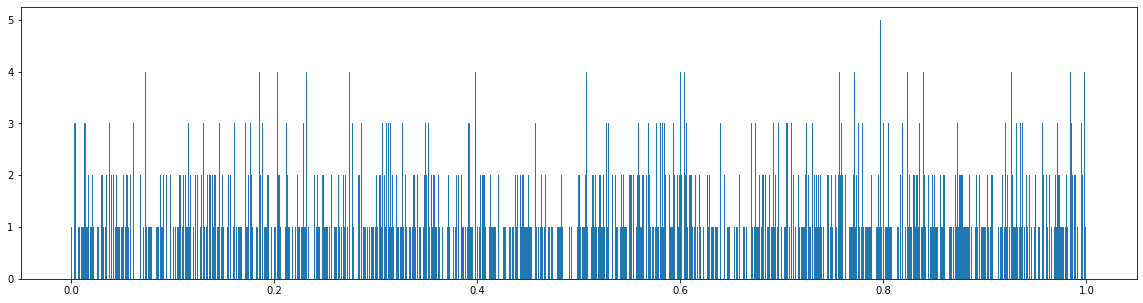

In [389]:
size = 1000
arr = generator_uniform(size)
plt.hist(arr, bins=len(arr))
plt.show()

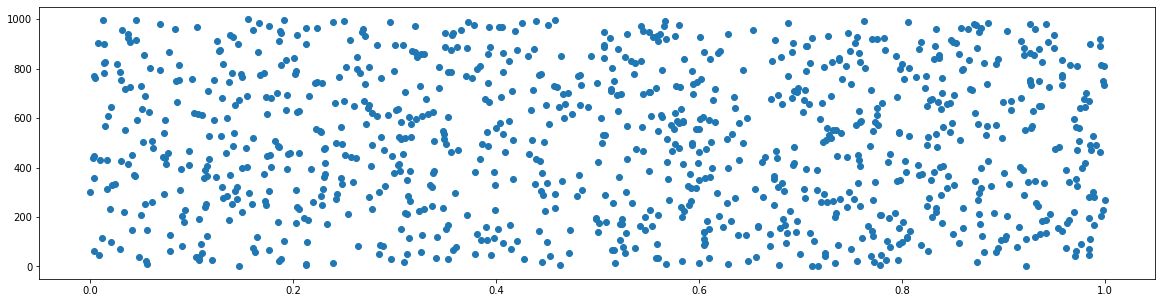

In [390]:
sizes = [i for i in range(size)]
plt.scatter(arr,sizes)
plt.show()

### Распределение Гаусса

$$ \frac{1}{\sigma \sqrt{ 2 \pi }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} } $$

Нормальное распределение, также называемое распределением Гаусса или Гаусса — Лапласа, или колоколообразная кривая — непрерывное распределение вероятностей с пиком в центре и симметричными боковыми сторонами, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса.

In [391]:
def generator_Gauss(mu, sigma):
  gauss_next = None
  z = gauss_next
  if z is None:
    x2pi = np.random.random() * 2 * np.pi
    g2rad = np.sqrt(-2.0 * np.log(1.0 - np.random.random()))
    z = np.cos(x2pi) * g2rad
    gauss_next = np.sin(x2pi) * g2rad

  return mu + z * sigma

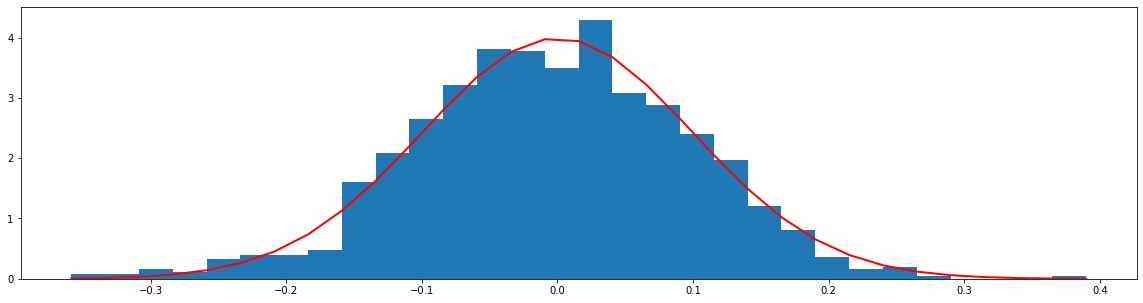

In [392]:
mu, sigma = 0, 0.1
s = [generator_Gauss(mu, sigma) for i in range(size)]
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

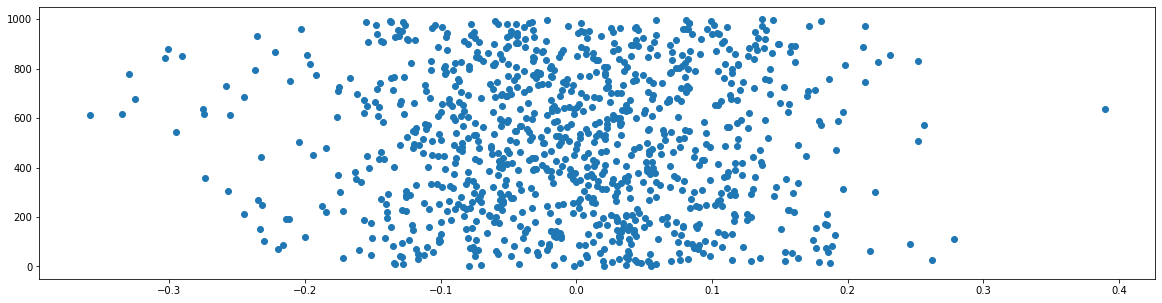

In [393]:
sizes = [i for i in range(size)]
plt.scatter(s,sizes)
plt.show()

### Два пика

In [394]:
def generator_two_peaks(size):
  res = []
  for i in range(size//2):
    res.append(generator_Gauss(-1, 1))
  for i in range(size//2):
    res.append(generator_Gauss(5, 1))
  return res

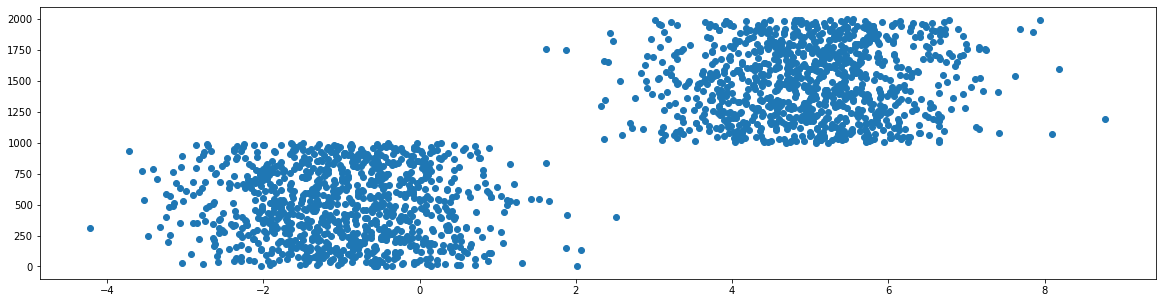

In [395]:
f = generator_two_peaks(size*2)
sizes_2 = [i for i in range(size*2)]
plt.scatter(f, sizes_2)
plt.show()

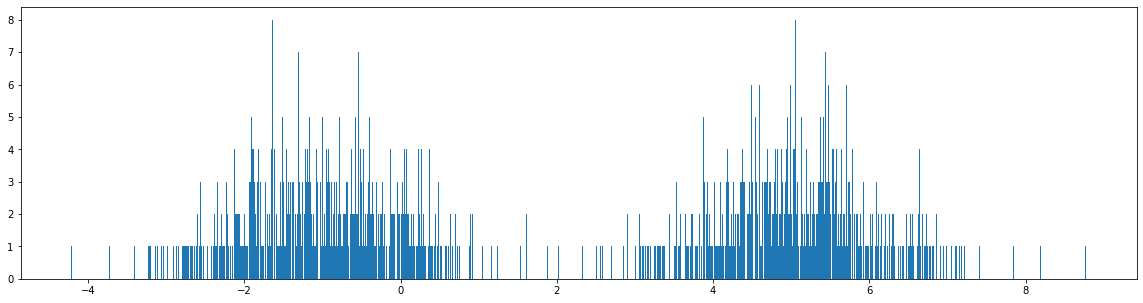

In [396]:
plt.hist(f, bins=len(f))
plt.show()

## 2. Реализация алгоритма Парзена - Розенблатта (h,k)

### Обобщенная оценка Парзена — Розенблатта по окну шириной h
### Функция ядра - гауссовская $ ((2\pi)^{-\frac{1}{2}}exp(-\frac{1}{2}r^{2})) $

In [397]:
def gauss_kernel(r):
  return np.sqrt(1 / 2 * np.pi) * np.exp(r**2 * (-0.5))

def parzen_estimation(x, x_all, h=0.2):
  k_m = 0
  for i in range(len(x_all)):
    k_m += gauss_kernel((x-x_all[i])/h)
  return (1/(len(x_all)*h)) * k_m

## 3. Восстановление плотности распределения на тестовых данных (графики)

In [398]:
def do_plot(density, size):
  point_x = np.array([0])

  X_all = np.vstack(np.array(density))
  border_min = min(density)
  border_max = max(density)
  x = np.linspace(border_min, border_max, size)

  points = np.zeros((size))

  fig, sp = plt.subplots(figsize=(20,8))
  sp.plot(x, parzen_estimation(x, X_all))
  sp.scatter(density, points, marker="|")
  sp.set_xlim((border_min, border_max))
  plt.show()

#### Стандартное равномерное распределение

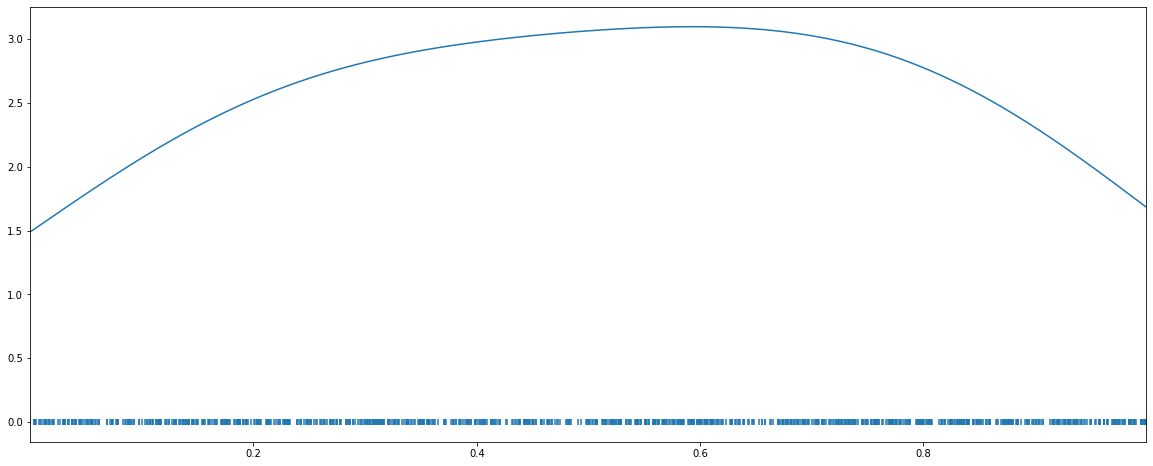

In [399]:
do_plot(arr, size)

#### Распределение Гаусса

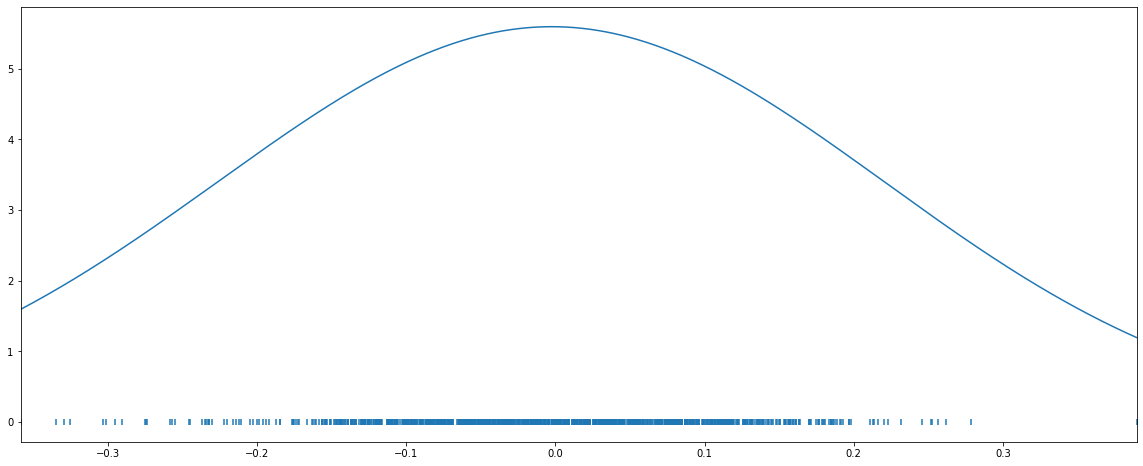

In [400]:
do_plot(s, size)

#### Два пика

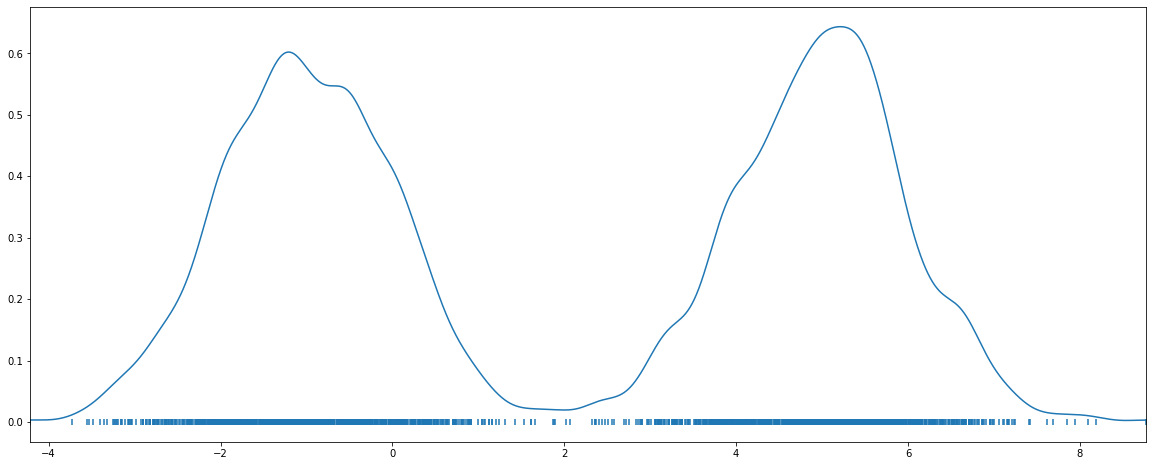

In [401]:
do_plot(f, size*2)

## 4. Применение метода leave-one-out для одного из наборов данных п.1

$$ LOO(h)=-\sum_{i=1}^{L}ln(\hat{p_{h}}(x_{i};\frac{X^{L}}{x_{i}})))\to\underset{h}{min} $$

In [402]:
def LOO(x, X_all, h):
  res = 0
  for i in range(len(X_all)):
    res -= np.log(parzen_estimation(x, X_all, h))
  return res

Значение LOO для ширины окна 5 на 1000 точках (Стандартное равномерное распределение)

In [403]:
point_x = np.array([0])
X_all = np.vstack(np.array(arr))
print(LOO(point_x, X_all, 5))

[1390.62272794]


## 5. Применение EM-алгоритма для двух пиков

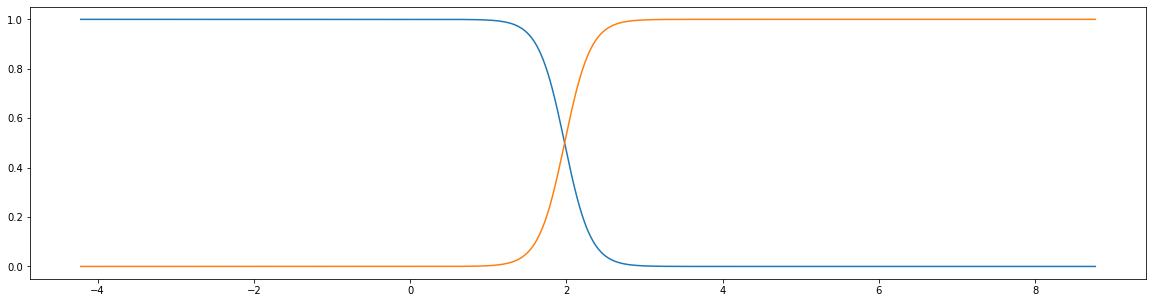

In [417]:
from sklearn.mixture import GaussianMixture

x = np.linspace(min(f), max(f), len(f))
f = np.array(f).reshape(-1,1)
gaussian_mix = GaussianMixture(2, random_state=0).fit(f)

plt.plot(x, gaussian_mix.predict_proba(np.array(x).reshape(-1,1))[:,0], x, gaussian_mix.predict_proba(np.array(x).reshape(-1,1))[:,1])
plt.show()